# Projet Big Data : Text Processing

## 1. Imports et configuration

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# chargement DataFrame
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,status_id,created_at,text,display_text_width,text_length
0,1538941385809747968,2022-06-20 17:46:33,Manic Mondays ☕\n\nFrom the 16th century onwar...,140,299
1,1538941854649032705,2022-06-20 17:48:24,southern softie commented on MailOnline: What ...,196,196
2,1538942219645861892,2022-06-20 17:49:51,MomToBe Women’s Rayon Maternity Dress/Easy Bre...,163,163
3,1538942452723335169,2022-06-20 17:50:47,@AlfredMwandagha Good for a breastfeeding bunn...,33,50
4,1538942645011030016,2022-06-20 17:51:33,We know more about cow’s milk than human milk....,140,197


## 2. Fonctions de nettoyage :

In [3]:
# suppression stopwords
stop_words = set(stopwords.words('english'))

# tokenisation
def tokenize_clean(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and len(t) >= 3]
    return tokens
# suppression balises, urls, mentions, hashtags, ponctuations    
def remove_noise(text):
    text = re.sub(r'http\S+', '', text)  # liens
    text = re.sub(r'@\w+', '', text)     # mentions
    text = re.sub(r'#\w+', '', text)     # hashtags
    text = re.sub(r'<.*?>', '', text)    # balises HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # caractères spéciaux
    return text
# nettoyage et tokenisation
def clean_and_tokenize(text):
    cleaned = remove_noise(text)
    tokens = tokenize_clean(cleaned)
    return tokens

## 3. Nettoyage et tokenisation

In [17]:
import nltk

# Chemin absolu vers le dossier nltk_data
nltk_data_path = "/home/hardocorelearner/projet/big_data_project/nltk_data"

# Forcer NLTK à utiliser ce chemin
nltk.data.path = [nltk_data_path] + nltk.data.path

# Télécharger punkt dans le dossier nltk_data
nltk.download("punkt_tab", download_dir=nltk_data_path)
df['tokens'] = df['text'].apply(clean_and_tokenize)

[nltk_data] Downloading package punkt_tab to /home/hardocorelearner/pr
[nltk_data]     ojet/big_data_project/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 4. Construction du corpus

In [18]:
corpus = df['tokens'].tolist()
flat_corpus = [token for doc in corpus for token in doc]

## 5. Statistiques

In [19]:
unique_tokens = set(flat_corpus)
print("Nombre de tokens uniques :", len(unique_tokens))

token_freq = Counter(flat_corpus)
hapax = [word for word, freq in token_freq.items() if freq == 1]
print("Nombre de tokens présents une seule fois :", len(hapax))

Nombre de tokens uniques : 57770
Nombre de tokens présents une seule fois : 23967


## 6. Réduction du vocabulaire

Suppression des hapax

In [20]:
def remove_rare_tokens(tokens, min_freq=2):
    return [token for token in tokens if token_freq[token] >= min_freq]

df['tokens'] = df['tokens'].apply(remove_rare_tokens)

Lemmatisation

In [22]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

nltk.download("wordnet", download_dir=nltk_data_path)

df['tokens_lemmatized'] = df['tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /home/hardocorelearner/proj
[nltk_data]     et/big_data_project/nltk_data...


## 7. WordCloud

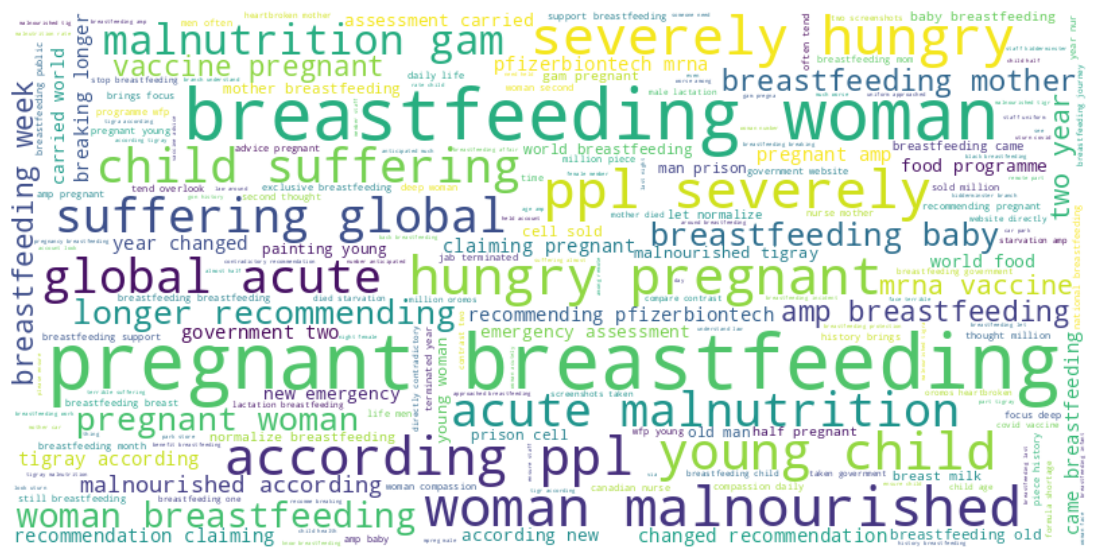

In [23]:
text_for_wc = ' '.join([' '.join(doc) for doc in df['tokens_lemmatized']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wc)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 8. Ajout colonne "text" nettoyée

In [26]:
df['clean_text'] = df['tokens_lemmatized'].apply(lambda x: ' '.join(x))

NameError: name 'de' is not defined

In [27]:
df.head()

,status_id,created_at,text,display_text_width,text_length,tokens,tokens_lemmatized,clean_text
0,1538941385809747968,2022-06-20 17:46:33,Manic Mondays ☕\n\nFrom the 16th century onwar...,140,299,"[manic, mondays, century, onwards, charity, of...","[manic, monday, century, onwards, charity, oft...",manic monday century onwards charity often rep...
1,1538941854649032705,2022-06-20 17:48:24,southern softie commented on MailOnline: What ...,196,196,"[southern, commented, concerning, adults, priv...","[southern, commented, concerning, adult, priva...",southern commented concerning adult private re...
2,1538942219645861892,2022-06-20 17:49:51,MomToBe Women’s Rayon Maternity Dress/Easy Bre...,163,163,"[momtobe, womens, rayon, maternity, dresseasy,...","[momtobe, womens, rayon, maternity, dresseasy,...",momtobe womens rayon maternity dresseasy breas...
3,1538942452723335169,2022-06-20 17:50:47,@AlfredMwandagha Good for a breastfeeding bunn...,33,50,"[good, breastfeeding, bunny]","[good, breastfeeding, bunny]",good breastfeeding bunny
4,1538942645011030016,2022-06-20 17:51:33,We know more about cow’s milk than human milk....,140,197,"[know, cows, milk, human, milk, new, research,...","[know, cow, milk, human, milk, new, research, ...",know cow milk human milk new research makeup b...


In [28]:
# sauvegarde
import joblib

df_model = df[['clean_text']]
df_model.to_csv("../data/processed_text.csv", index=False)

## 9. Explication des concepts NLP

N-Grams : séquences de N mots consécutifs dans un texte. Par exemple, un bigram de "good morning" est ["good morning"]. Cela permet de mieux capter le contexte que les mots seuls.

Bag of Words (BoW) : méthode qui représente un texte par un tableau des fréquences de mots, sans tenir compte de l’ordre. Simple mais efficace pour les modèles de base.

Term Frequency (TF) : mesure combien de fois un mot apparaît dans un document. Plus un mot est fréquent, plus il est considéré comme important dans ce document.

TF-IDF (Term Frequency – Inverse Document Frequency) : améliore la TF en réduisant l’importance des mots fréquents dans tous les documents (comme "le", "de", "et"). Cela met en valeur les mots distinctifs.

Named Entity Recognition (NER) : technique qui identifie et classe les entités nommées dans un texte, comme des personnes, lieux, dates ou organisations.

Word Embeddings : représentations vectorielles des mots qui capturent leur signification et relations sémantiques. Exemples : Word2Vec, GloVe. Deux mots proches dans le sens seront proches dans l’espace vectoriel.